In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_airlines", header=None,
                 names=["Airline ID", "Name", "Alias", "IATA", "ICAO", "Callsign", "Country", "Active" ])

In [3]:
df.set_index('Airline ID', inplace=True)

In [4]:
df.head(3)

,Name,Alias,IATA,ICAO,Callsign,Country,Active
Airline ID,,,,,,,
1,Private flight,\N,-,NaN,NaN,NaN,Y
2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [5]:
df.tail(3)

,Name,Alias,IATA,ICAO,Callsign,Country,Active
Airline ID,,,,,,,
19831,Fly Europa,NaN,ER,RWW,NaN,Spain,Y
19834,FlyPortugal,NaN,PO,FPT,FlyPortugal,Portugal,Y
19845,FTI Fluggesellschaft,NaN,NaN,FTI,NaN,Germany,N


## **Basic Stastics**

In [6]:
df.describe() #some quick stastics

,Name,Alias,IATA,ICAO,Callsign,Country,Active
count,6048,5614,1461,5961,5305,6033,6048
unique,5959,138,1090,5766,5215,276,3
top,National Airlines,\N,1I,\N,Inc.,United States,N
freq,5,5477,7,165,20,1080,4886


## **Cleaning the Data**

In [7]:
print(df.isnull().sum())

Name           0
Alias        434
IATA        4587
ICAO          87
Callsign     743
Country       15
Active         0
dtype: int64


In [8]:
print(df.notnull().sum())

Name        6048
Alias       5614
IATA        1461
ICAO        5961
Callsign    5305
Country     6033
Active      6048
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048 entries, 1 to 19845
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6048 non-null   object
 1   Alias     5614 non-null   object
 2   IATA      1461 non-null   object
 3   ICAO      5961 non-null   object
 4   Callsign  5305 non-null   object
 5   Country   6033 non-null   object
 6   Active    6048 non-null   object
dtypes: object(7)
memory usage: 378.0+ KB


In [10]:
# prompt: Using dataframe df: I want to convert columns: Country - Name - Alias  to type: String

#df[['Country', 'Name', 'Alias']] = df[['Country', 'Name', 'Alias']].astype('string')
#df[['IATA', 'ICAO', 'Callsign', 'Active']] = df[['IATA', 'ICAO', 'Callsign', 'Active']].astype('object')

In [11]:
#fill missing values with zeros - for now - simple cleaning
new_df = df.fillna(0)
new_df

,Name,Alias,IATA,ICAO,Callsign,Country,Active
Airline ID,,,,,,,
1,Private flight,\N,-,0,0,0,Y
2,135 Airways,\N,0,GNL,GENERAL,United States,N
3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,2 Sqn No 1 Elementary Flying Training School,\N,0,WYT,0,United Kingdom,N
5,213 Flight Unit,\N,0,TFU,0,Russia,N
...,...,...,...,...,...,...,...
19828,Vuela Cuba,Vuela Cuba,6C,6CC,0,Cuba,Y
19830,All Australia,All Australia,88,8K8,0,Australia,Y
19831,Fly Europa,0,ER,RWW,0,Spain,Y


In [12]:
print(new_df.isnull().sum())

Name        0
Alias       0
IATA        0
ICAO        0
Callsign    0
Country     0
Active      0
dtype: int64


In [13]:
# Get the unique countries
unique_countries = new_df['Country'].unique()

# List the unique countries
print("Unique Countries:")
for country in unique_countries:
    print(country)

Unique Countries:
0
United States
South Africa
United Kingdom
Russia
Thailand
Canada
Australia
Singapore
Belgium
Mexico
Spain
France
United Arab Emirates
Republic of Korea
Pakistan
Libya
Gambia
Ivory Coast
Ukraine
Democratic Republic of the Congo
Iran
Finland
Brazil
Colombia
AEROCENTER
Ghana
Kenya
Liberia
Togo
Somali Republic
Morocco
Canadian Territories
Dominican Republic
Japan
Albania
Nigeria
Germany
Slovenia
Czech Republic
Benin
AEROCESAR
Greece
Chile
Tanzania
Bolivia
Italy
Sweden
Argentina
Sierra Leone
Indonesia
Senegal
Afghanistan
Uganda
Bosnia and Herzegovina
Gabon
Angola
Uzbekistan
Namibia
Turkey
Vietnam
Zambia
Venezuela
Egypt
Ireland
Switzerland
Serbia
Peru
Slovakia
Denmark
Azerbaijan
AIRPORT HELICOPTER
Hong Kong
Croatia
Hungary
Estonia
Swaziland
India
Reunion
Iceland
Israel
Austria
Jamaica
Malta
Portugal
Cyprus
Kazakhstan
Kyrgyzstan
Turkmenistan
Kiribati
Cambodia
Netherlands Antilles
Sao Tome and Principe
ALNACIONAL
Lithuania
Maldives
Malawi
Moldova
Montenegro
Macao
Seychelles

#### Cleaning the "Country" Column again

In [14]:
new_df["Country"].isnull().sum() #1- handle missing data (if available)

0

In [15]:
# 2A- Map unconventional values to their correct country names
country_mapping = {
    'AEROCENTER': 'Switzerland',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Congo (Brazzaville)': 'Republic of the Congo'
}

new_df['Country'] = new_df['Country'].replace(country_mapping)

# 2B- Drop non-country rows
values_to_remove = ['Canadian Territories', 'AIRPORT HELICOPTER', '\\N', 'S', 'AIR-MAUR', 'American Samoa']
new_df = new_df[~new_df['Country'].isin(values_to_remove)]

In [16]:
#print again the list of unique countries
unique_countries = new_df['Country'].unique()

# List the unique countries
print("Unique Countries:")
for country in unique_countries:
    print(country)


Unique Countries:
0
United States
South Africa
United Kingdom
Russia
Thailand
Canada
Australia
Singapore
Belgium
Mexico
Spain
France
United Arab Emirates
Republic of Korea
Pakistan
Libya
Gambia
Ivory Coast
Ukraine
Democratic Republic of the Congo
Iran
Finland
Brazil
Colombia
Switzerland
Ghana
Kenya
Liberia
Togo
Somali Republic
Morocco
Dominican Republic
Japan
Albania
Nigeria
Germany
Slovenia
Czech Republic
Benin
AEROCESAR
Greece
Chile
Tanzania
Bolivia
Italy
Sweden
Argentina
Sierra Leone
Indonesia
Senegal
Afghanistan
Uganda
Bosnia and Herzegovina
Gabon
Angola
Uzbekistan
Namibia
Turkey
Vietnam
Zambia
Venezuela
Egypt
Ireland
Serbia
Peru
Slovakia
Denmark
Azerbaijan
Hong Kong
Croatia
Hungary
Estonia
Swaziland
India
Reunion
Iceland
Israel
Austria
Jamaica
Malta
Portugal
Cyprus
Kazakhstan
Kyrgyzstan
Turkmenistan
Kiribati
Cambodia
Netherlands Antilles
Sao Tome and Principe
ALNACIONAL
Lithuania
Maldives
Malawi
Moldova
Montenegro
Macao
Seychelles
Bulgaria
Papua New Guinea
Latvia
ANTARES
AVINOR
Ne

## Data Visualization

In [17]:
# Group by country and count the number of airlines in each country
country_counts = new_df.groupby('Country').size().reset_index(name='Number of Airlines')

# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(country_counts)

                                   Country  Number of Airlines
0    0                                      15                
1     Boonville Stage Line                  1                 
2     S.A.                                  1                 
3    ACOM                                   1                 
4    ACTIVE AERO                            1                 
5    AEROCESAR                              1                 
6    AEROPERLAS                             1                 
7    AEROPUMA                               1                 
8    AEROSOL                                1                 
9    AEROSUN                                1                 
10   AEROVARADERO                           1                 
11   AEROWEE                                1                 
12   AIR CLASS                              1                 
13   AIR FREIGHTER                          1                 
14   AIR PRINT                              1          

<ipython-input-17-98fcd8683775>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<ipython-input-18-a04ad40c4ee4>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


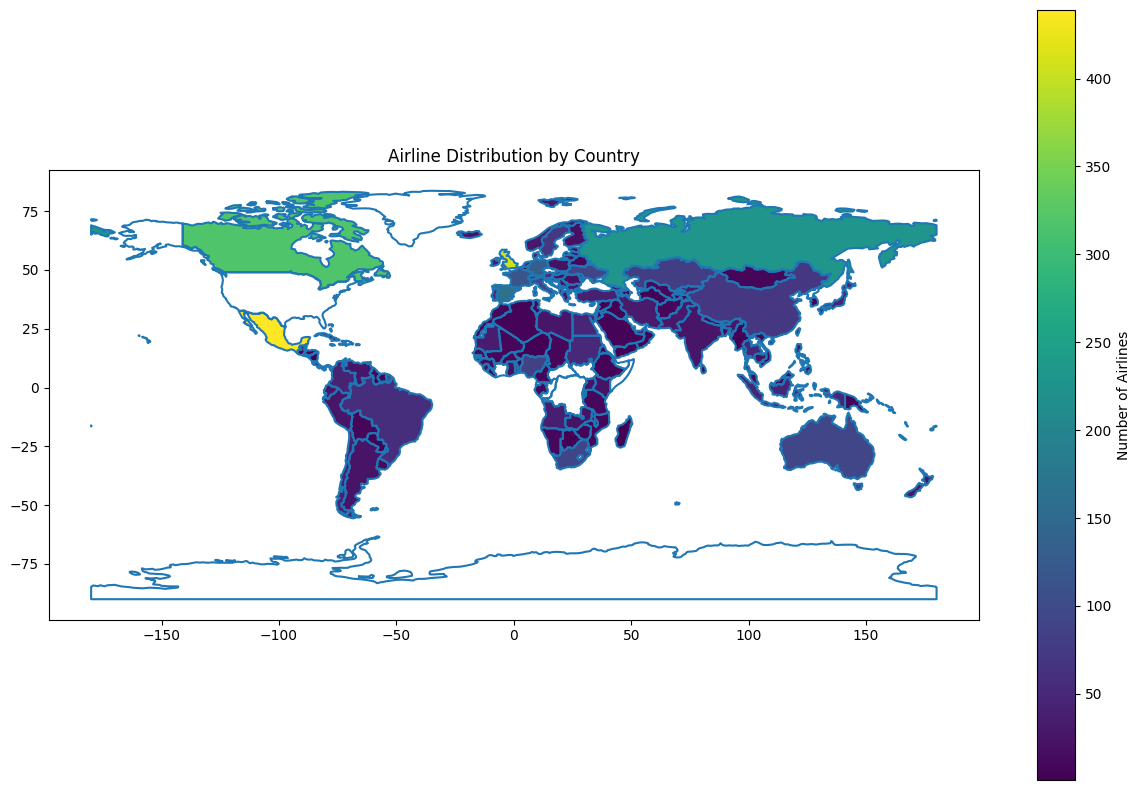

In [18]:
# Merge with a world map GeoDataFrame

#1- load worl map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#2- merge the world map GeoDataFrame (world) with the DataFrame (country_counts) based on the country names.
merged = world.merge(country_counts, how='left', left_on='name', right_on='Country')

# 3- Plot the world map with markers
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)

#4- plot the choropleth (colored) map
merged.plot(column='Number of Airlines', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Number of Airlines"})


plt.title('Airline Distribution by Country')
plt.show()


<ipython-input-19-92bebb337526>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


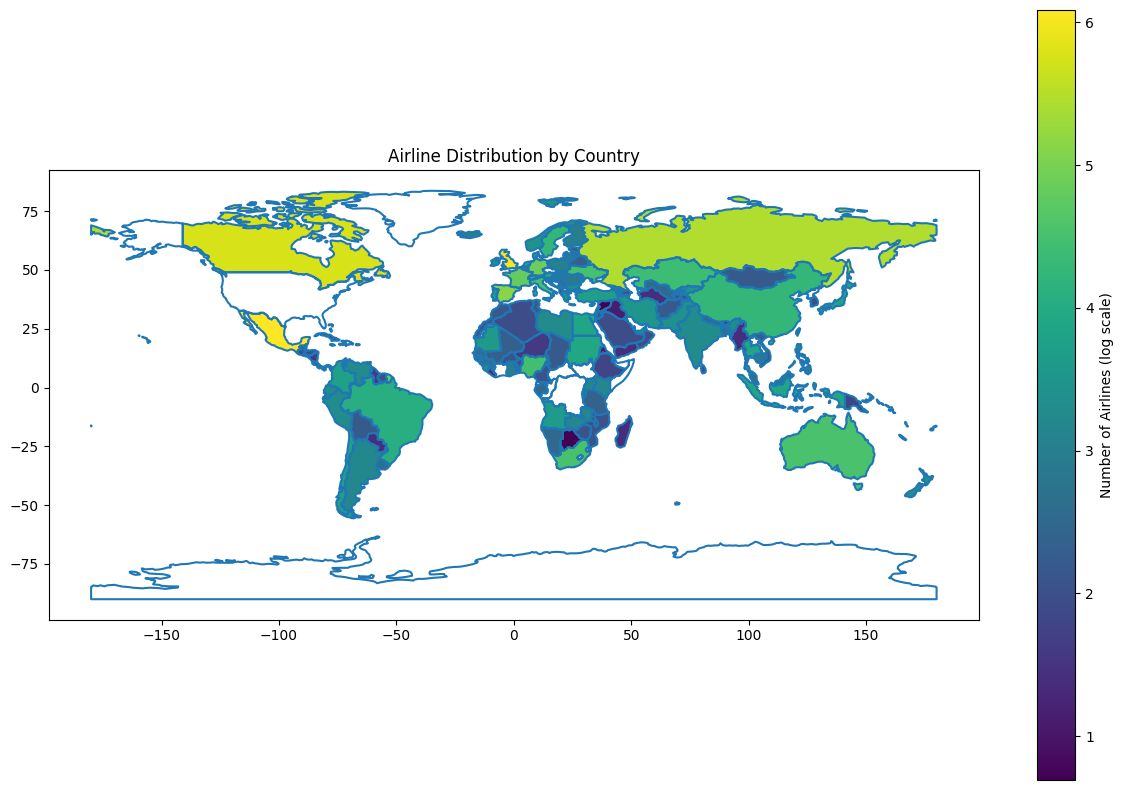

In [19]:
# METHOD 2 - using a logarithmic scale

# Merge with a world map GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(country_counts, how='left', left_on='name', right_on='Country')

# Plot the world map with markers
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)

# Apply a logarithmic scale to the color scale
merged['log_Number of Airlines'] = np.log1p(merged['Number of Airlines'])
merged.plot(column='log_Number of Airlines', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Number of Airlines (log scale)"})
plt.title('Airline Distribution by Country')
plt.show()
